<a href="https://colab.research.google.com/github/Abhyuday19/Projects/blob/main/Simple_Neural_Network(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create the model class that inherits the nn.module
class Model(nn.Module):
  def __init__(self, in_features= 4, h1=9 , h2 = 10 , out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features , h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2 , out_features)

  def forward(self , x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(35)

# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
my_df = pd.read_csv('Iris.csv')

In [ ]:
my_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# changing the last columns from names("string") to numbers('Integers)
my_df['Species'] = my_df['Species'].replace('Iris-setosa' , 0.0)
my_df['Species'] = my_df['Species'].replace('Iris-versicolor' , 1.0)
my_df['Species'] = my_df['Species'].replace('Iris-virginica' , 2.0)
my_df

<ipython-input-119-dd0148e52ae6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Species'] = my_df['Species'].replace('Iris-virginica' , 2.0)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train Test Split
X = my_df.drop(['Id' , 'Species' ], axis =1)
y = my_df['Species']

In [ ]:
# Now convert these to Numpy Arrays
X = X.values
y = y.values

In [ ]:
# now using sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 34)

In [ ]:
# Converting X features to Float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Converting y labels to y long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the Criterion of model to measure the error  , how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#Chose an optimizer(Adam optimizer) , lr = learning rate  (if error dose not go after a bunch of iterations(epochs) , then we will lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7c82b0ff5460>

In [ ]:
# Train our model
# Epoch (one run thru all the training data in the network)
epochs = 100
losses =[]

for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # Measure the loss/error , gonna be high at first
  loss = criterion(y_pred , y_train) # predicted values vs the y_train


  # Keep track of the losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} and loss {loss}')

  # Do some back propagation: take the error rate of feed forward propagation amd feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss 1.4353138208389282
Epoch: 10 and loss 0.9908270239830017
Epoch: 20 and loss 0.8323488831520081
Epoch: 30 and loss 0.6241376996040344
Epoch: 40 and loss 0.45754319429397583
Epoch: 50 and loss 0.3503830134868622
Epoch: 60 and loss 0.25599709153175354
Epoch: 70 and loss 0.17198579013347626
Epoch: 80 and loss 0.11715266853570938
Epoch: 90 and loss 0.08811984211206436


Text(0.5, 0, 'epoch')

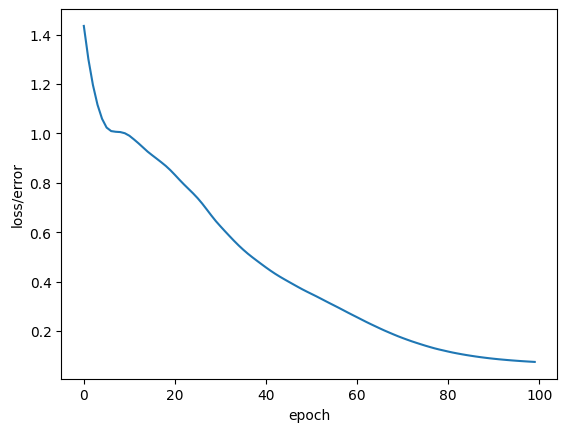

In [ ]:
# Graphing the loses of the above losses
plt.plot(range(epochs) , losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')

In [ ]:
# Evaluate the Model on the test Data Set(Validate the model on test set)
with torch.no_grad(): # Basically turn off the back propagation
  y_eval = model.forward(X_test) # x_test are features from aur test set , y_eval will be predictions
  loss = criterion(y_eval , y_test) # Find the loss or error

In [ ]:
loss

tensor(0.0529)

In [ ]:
correct = 0
with torch.no_grad():
  for i , data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of the flower class our network is thinking it is.
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item()== y_test[i]:
      correct += 1


print(f'We got {correct} Correct!')

1.) tensor([-3.7289,  3.0731, -1.8277]) 	 1 	1
2.) tensor([-10.7374,   0.8103,   2.9602]) 	 2 	2
3.) tensor([11.2438,  3.7572, -9.6144]) 	 0 	0
4.) tensor([-3.0424,  2.5306, -1.4862]) 	 1 	1
5.) tensor([-9.0801,  1.3753,  1.7842]) 	 2 	2
6.) tensor([-5.8883,  2.2111, -0.1578]) 	 1 	1
7.) tensor([ 11.7845,   3.8823, -10.0356]) 	 0 	0
8.) tensor([ 12.3895,   3.9198, -10.4185]) 	 0 	0
9.) tensor([-5.2345,  2.9128, -1.1408]) 	 1 	1
10.) tensor([-2.4998,  3.1325, -2.3072]) 	 1 	1
11.) tensor([10.3725,  3.4920, -8.8867]) 	 0 	0
12.) tensor([-6.1768,  2.2695, -0.1400]) 	 1 	1
13.) tensor([10.8492,  3.6624, -9.3013]) 	 0 	0
14.) tensor([-2.6647,  3.0871, -2.2255]) 	 1 	1
15.) tensor([ 12.8025,   4.0747, -10.7867]) 	 0 	0
16.) tensor([-4.9053,  2.4533, -0.7602]) 	 1 	1
17.) tensor([10.0687,  3.7164, -8.8381]) 	 0 	0
18.) tensor([11.0995,  3.7118, -9.4962]) 	 0 	0
19.) tensor([-5.8313,  2.8085, -0.8203]) 	 1 	1
20.) tensor([-9.2857,  1.3425,  1.8883]) 	 2 	2
21.) tensor([ 9.8634,  3.4584, -8.539

In [ ]:
# Save Our Neural Network
torch.save(model.state_dict() , 'My_Simple_Iris_Neural_Network_Model.pt')


In [ ]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('My_Simple_Iris_Neural_Network_Model.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it laoded successfully
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)